In [48]:
from scipy.stats import gamma, binom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
deals = binom.rvs(30, .2, size=1000)
sales = gamma.rvs(4, scale=500, size=1000)

In [33]:
def plot_sample(sample, kind='kde'):
    sns.displot(sample, kind=kind)

    plt.show()

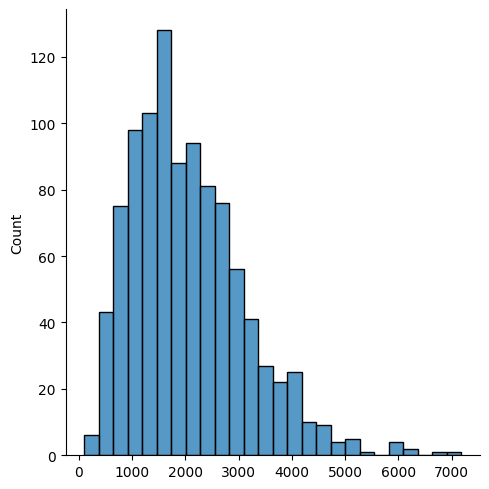

In [34]:
plot_sample(sales, kind='hist')

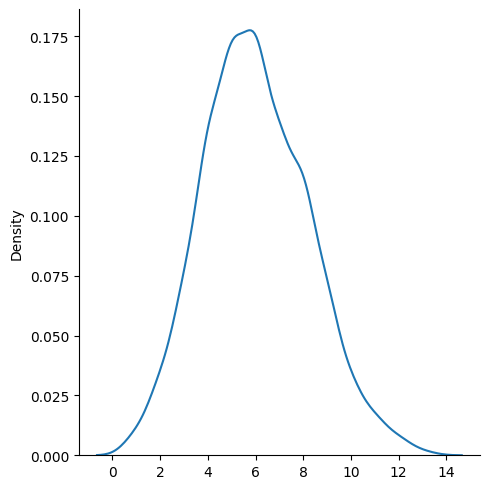

In [26]:
plot_sample(deals)

In [41]:
import itertools
z = itertools.product(deals, sales)

In [42]:
z = [a * b for (a, b) in z]

<Axes: ylabel='Count'>

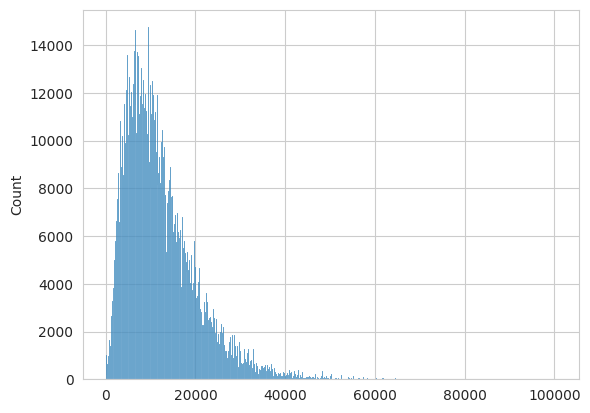

In [52]:
sns.histplot(z)

In [53]:
from scipy.stats import gaussian_kde

z_density = gaussian_kde(z)

z_values = np.linspace(min(z), max(z), 1000)

z_pdf = z_density(z_values)

In [67]:
# Profit density
profit_density = gaussian_kde((1/2) * np.array(z))

profit_values = np.linspace(min(z), max(z), 1000)

profit_pdf = profit_density(profit_values)

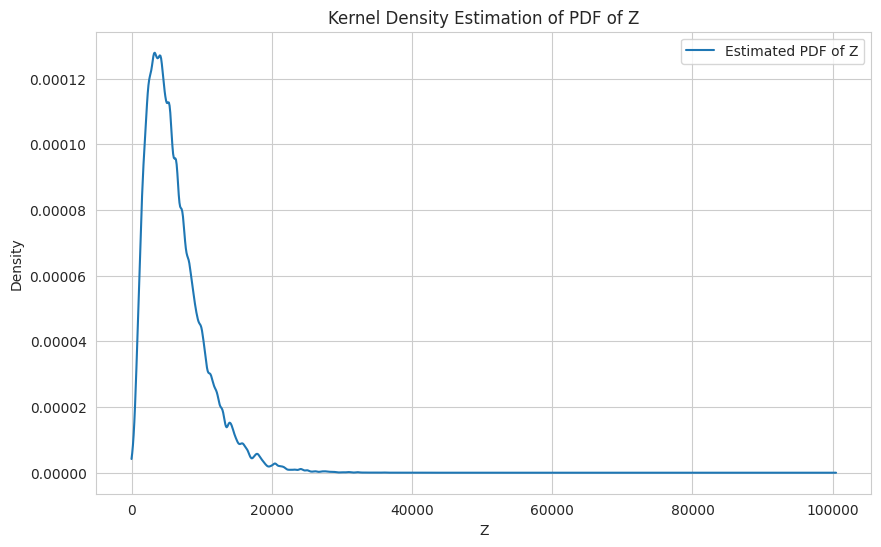

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(profit_values, profit_pdf, label='Estimated PDF of Z')
plt.title('Kernel Density Estimation of PDF of Z')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.show()

In [65]:
a, b = 20000, 23000

# Use numerical integration to estimate the probability of Z being in the interval [a, b]
probability = np.trapz(y=z_density(np.linspace(a, b, 1000)), x=np.linspace(a, b, 1000))
print(f"Probability of 99.5 <= Z <= 100.5 is approximately {probability:.4f}")

Probability of 99.5 <= Z <= 100.5 is approximately 0.0513


In [78]:
def likelihood_profit(amt):
    probability = np.trapz(y=profit_density(np.linspace(amt, max(.5*np.array(z)), 1000)), x=np.linspace(amt, max(.5*np.array(z)), 1000))
    print(f"Probability of ${amt} or more profit is approximately {probability:.4f}")

likelihood_profit(20000)

Probability of $20000 or more profit is approximately 0.0093
